Esse notebook irá demonstrar alguns gráficos para compreender melhor a estrutura do dataset. Primeiro com o arquivo sem tratativas, somente como foi lido pela biblioteca `pandas`, depois como ficaram os dados limpos.

Primeiro declaramos as funções para exibir determinado gráfico/conjunto de gráficos, junto com uma breve explicação sobre o por que essa visualização é relevante. Depois, cada gráfico é aplicado para o dataset sem e com tratativas, respectivamente.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Tipos de dados obtidos na leitura do arquivo

Aqui vemos qual tipo de dado foi inferido para cada coluna após a leitura do arquivo .csv

In [ ]:
def show_datatypes(df):
    dtype_series = df.dtypes.astype(str)
    
    plt.figure(figsize=(12, 6))
    
    plt.bar(dtype_series.index, [1] * len(dtype_series))
    plt.xticks(rotation=90)
    plt.title("Tipo de dado lido em cada coluna")
    plt.ylabel("dtype (somente representativo)")
    
    for i, dtype in enumerate(dtype_series):
        plt.text(i, 1.02, dtype, ha='center', rotation=90, fontsize=9)
    
    plt.ylim(0, 1.25)
    plt.tight_layout()
    plt.show()

def show_datatypes_percentage(df):
    dtype_counts = df.dtypes.value_counts()

    dtype_percent = (dtype_counts / dtype_counts.sum()) * 100
    plt.figure(figsize=(6, 6))
    plt.pie(dtype_percent.values, labels=dtype_percent.index.astype(str), autopct="%1.1f%%")
    plt.title("Porcentagem de colunas por tipo")
    plt.show()
    

### Distribução dos dados

A distribuição auxilia na visualização da dispersão dos dados por coluna. Analisar a distribuição dos dados é fundamental para a compreensão do dataset.

In [29]:
def show_distribution(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(15, 12))
    for i, col in enumerate(num_cols, 1):
        plt.subplot((len(num_cols)//3)+1, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribuição de {col}")
    
    plt.tight_layout()
    plt.show()

### Outliers

Conforme mencionado na análise da distribuição, existem outliers em alguns atributos analisados. Nesse gráfico, a caixa representa o intervalo entre o 25º e 75º percentil (Q1 e Q3), o que cobre 50% dos dados centrais, a linha no meio da caixa representa a mediana (50º percentil), as antenas nas bordas representam os limites, e os pontos fora das antenas, os outliers.

In [ ]:
def show_outliers(df):
    num_cols = df.select_dtypes(include=[np.number]).columns

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot((len(num_cols)//3)+1, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f"Outliers em {col}")
    
    plt.tight_layout()
    plt.show()


### Média vs mediana

Essa comparação é interessante para analisar a assimetria. Se a média for muito maior que a mediana, indica que os dados são assimétricos a direita

In [ ]:
def show_means_vs_medians(df):
    num_cols = df.select_dtypes(include=[np.number]).columns

    means = df[num_cols].mean()
    medians = df[num_cols].median()
    
    plt.figure(figsize=(10, 6))
    plt.plot(means.index, means.values, marker='o', label='Média')
    plt.plot(medians.index, medians.values, marker='o', label='Mediana')
    plt.xticks(rotation=90)
    plt.title("Comparação entre Média e Mediana")
    plt.legend()
    plt.show()


### Categorias mais frequentes

Uma análise simples dos valores mais frequentes para as colunas detectadas do tipo string ou object. Aqui já conseguimos observar alguns valores fora do esperado, ou com erros de digitação, por exemplo.

In [1]:
def show_category_count(df):
    text_cols = df.select_dtypes(include=["object", "string"]).columns.tolist()

    for col in text_cols:
        plt.figure(figsize=(10, 4))
        df[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"Top 10 categorias em: {col}")
        plt.xlabel("Categoria")
        plt.ylabel("Frequência")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Dados sem tratativas

In [ ]:
df = pd.read_csv('data.csv', sep=',')

show_datatypes_percentage(df)
show_datatypes(df)
show_distribution(df)
show_outliers(df)
show_means_vs_medians(df)
show_category_count(df)


/tmp/ipykernel_3850117/4203974156.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', sep=',')


# Após tratativa

/tmp/ipykernel_3850117/3435166138.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv', sep=',')


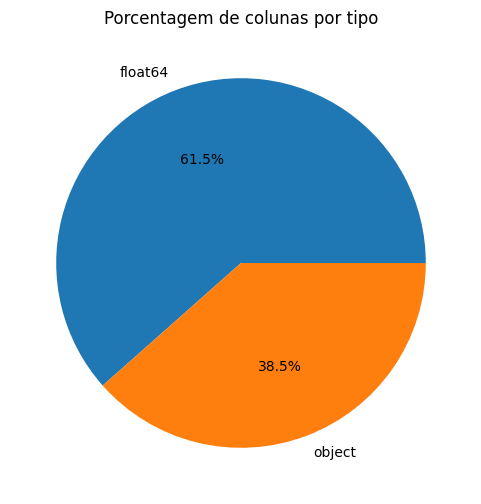

Gráfico da porcentagem de tipos de dados exibido


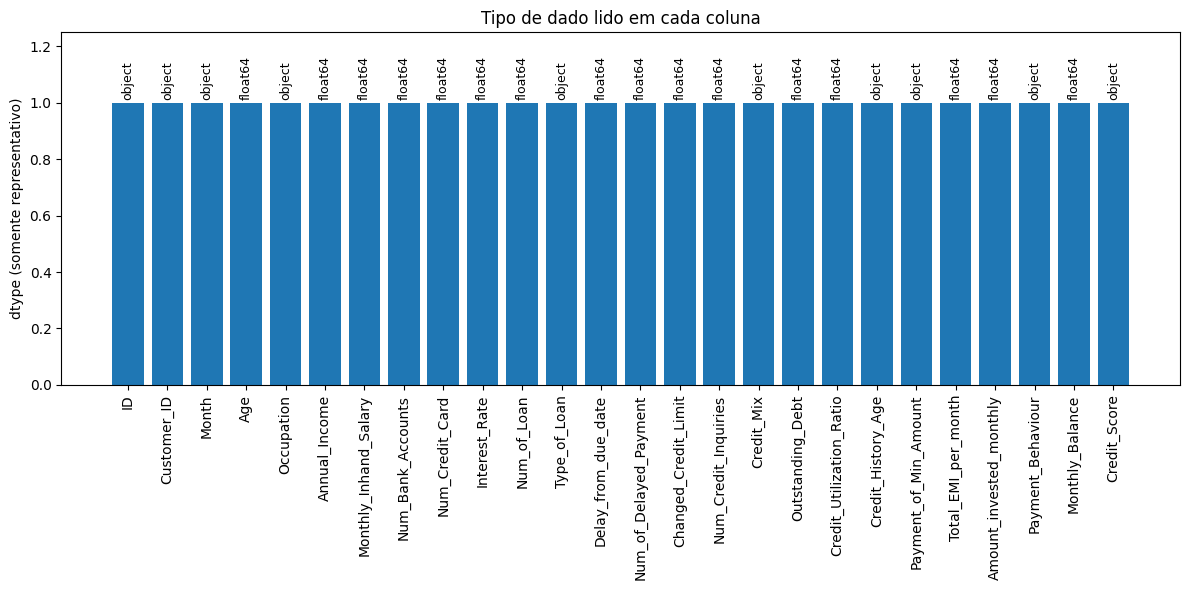

Gráfico da tipos de dados por coluna exibido


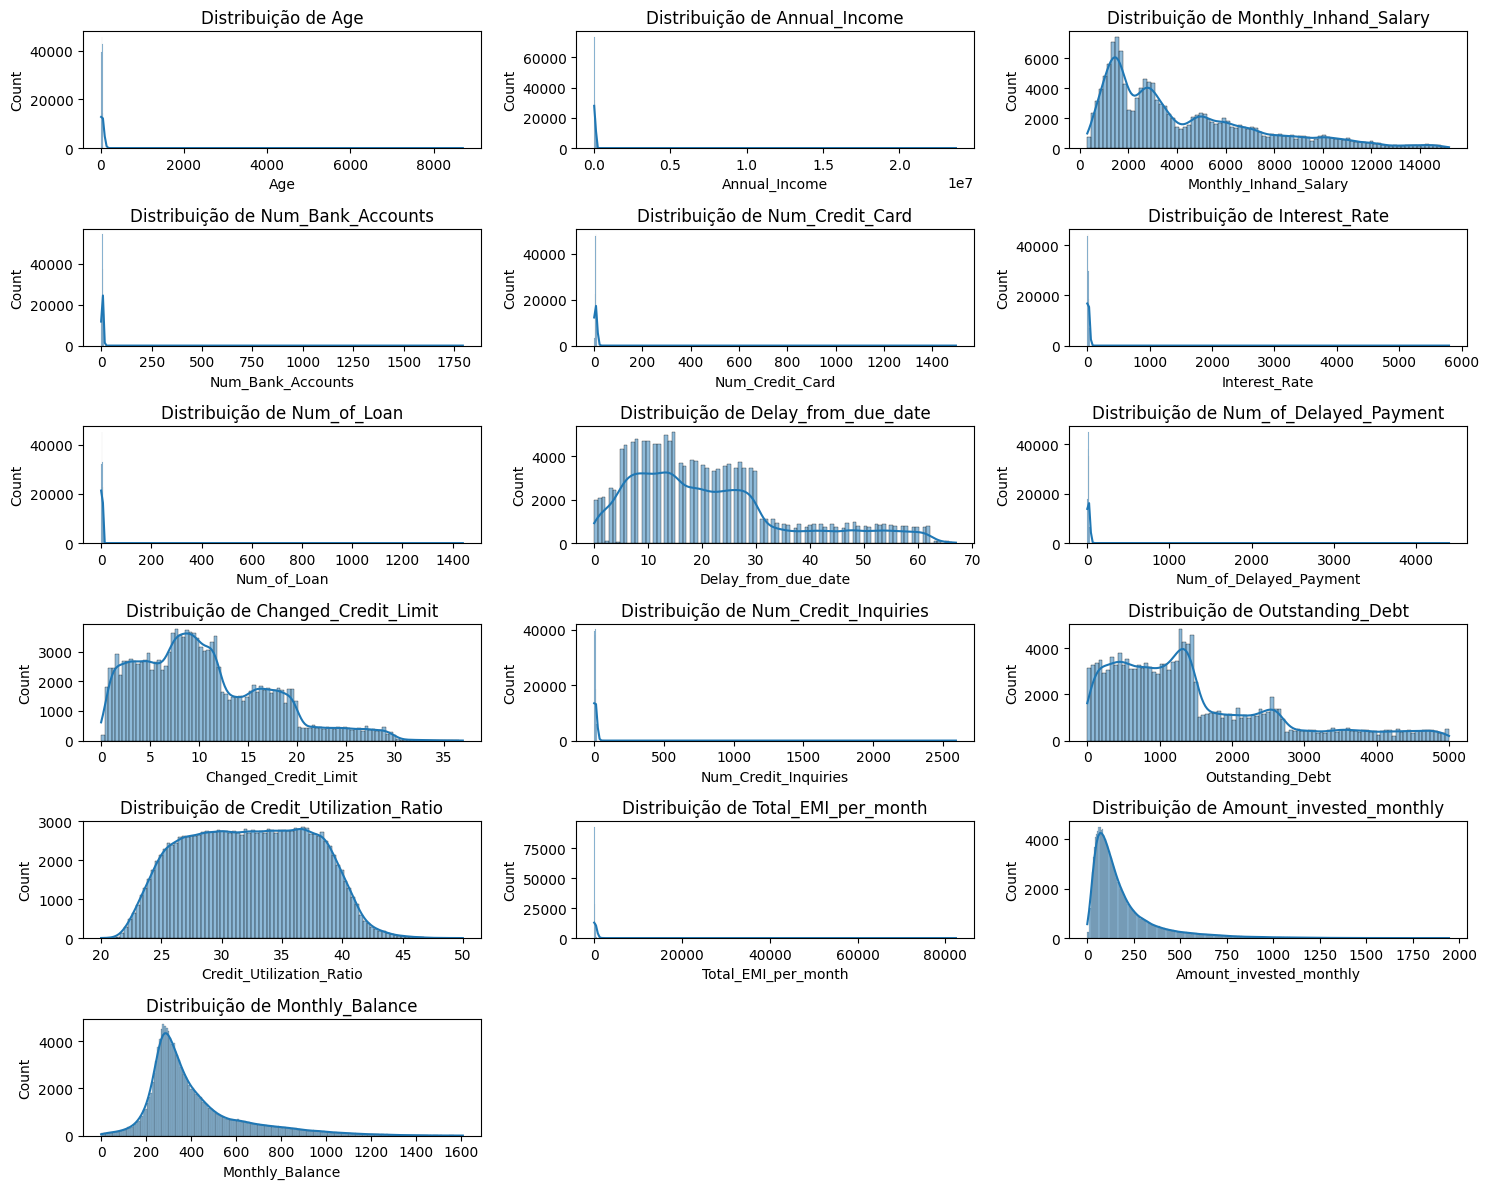

Gráfico da distribuição exibido


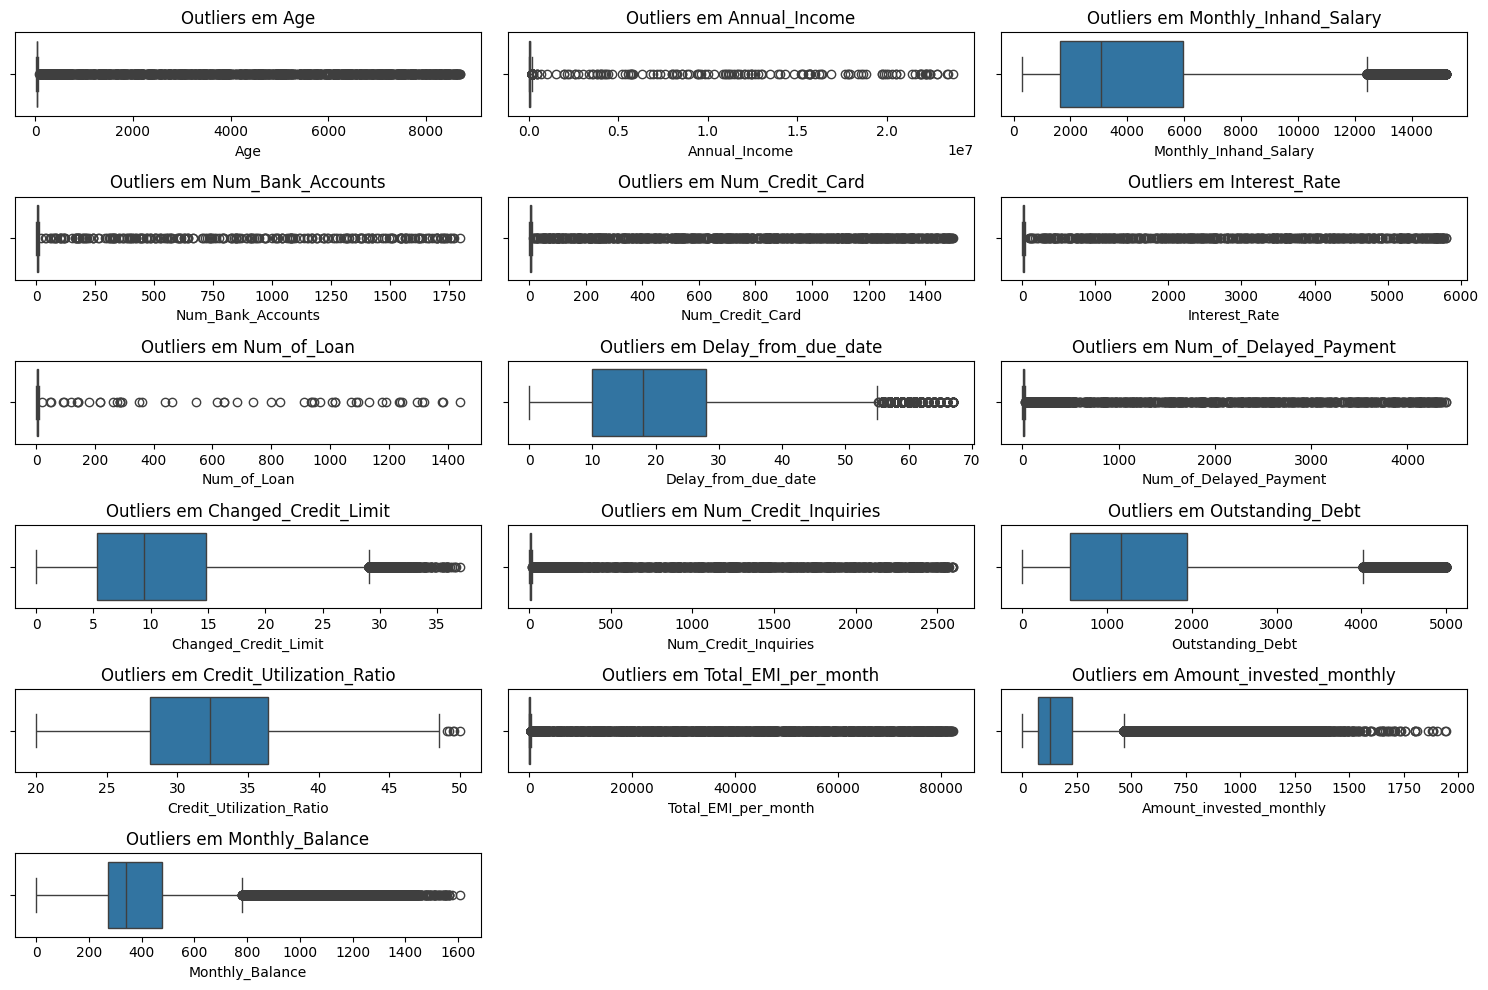

Gráfico de outliers exibido


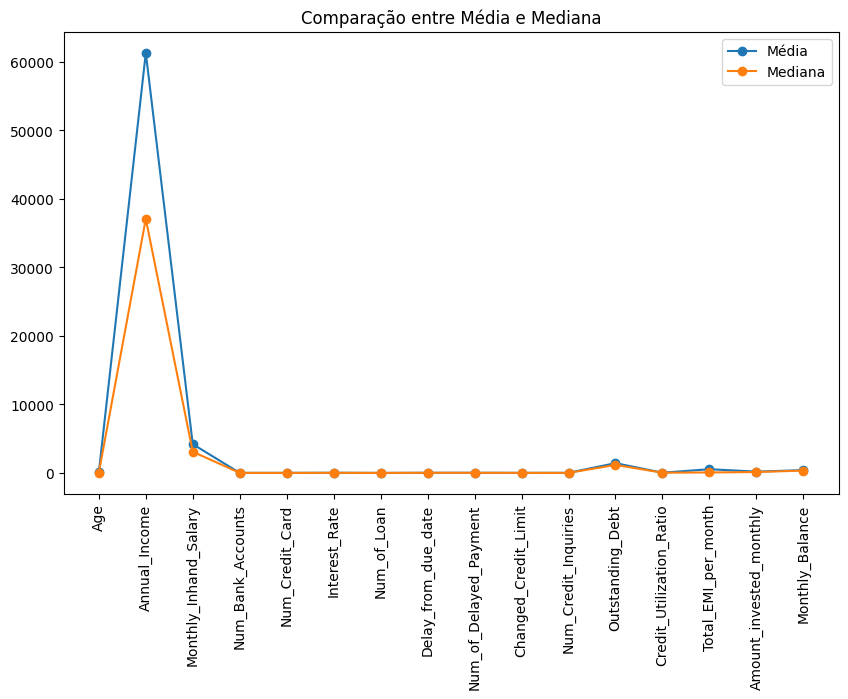

Gráfico da mediana vs média exibido


In [ ]:
df = pd.read_csv('cleaned_data.csv', sep=',')

show_datatypes_percentage(df)
show_datatypes(df)

show_distribution(df)
show_outliers(df)
show_means_vs_medians(df)
show_category_count(df)